In [45]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [46]:
BAC_raw = pd.read_csv("C:\\Users\\SUKHJIT\\Documents\\AMS325-FinalProject\\AMS325-RawProjectData\\BAC.US_D1.csv", parse_dates=['datetime'])
#parsed the date column into date format
print(BAC_raw)

BAC_raw.rename(columns={'datetime': 'Date','close':'Close'}, inplace=True)

BAC_proc = BAC_raw.drop(columns=['open','high','low','volume'])
BAC_proc["Percent Change"] = BAC_proc['Close'].pct_change()*100

start = (np.where(BAC_proc['Date'] == datetime.datetime(2015, 1, 2))[0])[0]
end = (np.where(BAC_proc['Date'] == datetime.datetime(2019, 12, 31))[0])[0]+1
BAC_proc = BAC_proc[start:end]

print(BAC_proc)
#Left with Close and Percent Change of Close Columns from Jan 2 2015 to end of 2019

#summary statistics of percent change column
ave_BACoverall = BAC_proc['Percent Change'].describe()['mean']
print('Overall average percent change:', ave_BACoverall)

       datetime   open   high    low  close    volume
0    1998-01-02  30.19  30.50  29.73  30.38   2089631
1    1998-01-05  31.65  31.78  30.87  31.22   5821768
2    1998-01-06  31.68  31.76  30.65  30.81   8081564
3    1998-01-07  31.69  31.98  30.25  31.00   8945955
4    1998-01-08  30.48  31.36  30.25  30.69   9085504
...         ...    ...    ...    ...    ...       ...
6634 2024-03-08  35.62  36.13  35.50  35.59  38412259
6635 2024-03-09  35.60  35.61  35.59  35.60   3632079
6636 2024-03-11  35.39  35.93  35.27  35.89  29377764
6637 2024-03-12  35.90  36.15  35.78  35.96  24420397
6638 2024-03-13  35.96  36.45  35.96  36.08  34379011

[6639 rows x 6 columns]
           Date  Close  Percent Change
4277 2015-01-02  17.89        0.000000
4278 2015-01-05  17.39       -2.794857
4279 2015-01-06  16.85       -3.105233
4280 2015-01-07  16.95        0.593472
4281 2015-01-08  17.29        2.005900
...         ...    ...             ...
5530 2019-12-24  35.24        0.199033
5531 2019-12-26

In [47]:
#this stores the overall average during this time period
print(BAC_proc)
ave_BAC_overall = BAC_proc['Percent Change'].describe()['mean']

#in this code, th15s correBAConds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
th15s = (np.where(BAC_proc['Date'] == datetime.datetime(2015, 11, 24))[0])[0]
th15e = (np.where(BAC_proc['Date'] == datetime.datetime(2015, 11, 30))[0])[0]+1
th16s = (np.where(BAC_proc['Date'] == datetime.datetime(2016, 11, 22))[0])[0]
th16e = (np.where(BAC_proc['Date'] == datetime.datetime(2016, 11, 28))[0])[0]+1
th17s = (np.where(BAC_proc['Date'] == datetime.datetime(2017, 11, 21))[0])[0]
th17e = (np.where(BAC_proc['Date'] == datetime.datetime(2017, 11, 27))[0])[0]+1
th18s = (np.where(BAC_proc['Date'] == datetime.datetime(2018, 11, 20))[0])[0]
th18e = (np.where(BAC_proc['Date'] == datetime.datetime(2018, 11, 26))[0])[0]+1
th19s = (np.where(BAC_proc['Date'] == datetime.datetime(2019, 11, 26))[0])[0]
th19e = (np.where(BAC_proc['Date'] == datetime.datetime(2019, 12, 2))[0])[0]+1
print(th15s, th15e, th16s, th16e, th17s, th17e, th18s, th18e, th19s, th19e)

#This concatenates the 5 selected intervals into one dataframe, BAC_th, which contains the thanksgivings for this stock, S&P 500
BAC_th = pd.concat([BAC_proc.iloc[th15s:th15e],BAC_proc.iloc[th16s:th16e],BAC_proc.iloc[th17s:th17e],BAC_proc.iloc[th18s:th18e],BAC_proc.iloc[th19s:th19e],], ignore_index=True)
print(BAC_th)

#this line obtains the mean of the thanksgiving data
ave_BACth = BAC_th['Percent Change'].describe()['mean']
print(ave_BACth, ave_BAC_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.839, the answer is no signficant differents
statistic, pvalue_BACth = stats.ttest_ind(a=BAC_proc['Percent Change'], b=BAC_th['Percent Change'], equal_var=False)
print(pvalue_BACth)

           Date  Close  Percent Change
4277 2015-01-02  17.89        0.000000
4278 2015-01-05  17.39       -2.794857
4279 2015-01-06  16.85       -3.105233
4280 2015-01-07  16.95        0.593472
4281 2015-01-08  17.29        2.005900
...         ...    ...             ...
5530 2019-12-24  35.24        0.199033
5531 2019-12-26  35.52        0.794552
5532 2019-12-27  35.36       -0.450450
5533 2019-12-30  35.17       -0.537330
5534 2019-12-31  35.21        0.113733

[1258 rows x 3 columns]
226 230 477 481 728 732 979 983 1234 1238
         Date  Close  Percent Change
0  2015-11-24  17.48        0.057241
1  2015-11-25  17.44       -0.228833
2  2015-11-27  17.51        0.401376
3  2015-11-30  17.44       -0.399772
4  2016-11-22  20.28       -0.294985
5  2016-11-23  20.56        1.380671
6  2016-11-25  20.90        1.653696
7  2016-11-28  20.31       -2.822967
8  2017-11-21  26.76        0.112233
9  2017-11-22  26.65       -0.411061
10 2017-11-24  26.56       -0.337711
11 2017-11-27  26.60 

In [48]:
#in this code, th15s correBAConds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
va15s = (np.where(BAC_proc['Date'] == datetime.datetime(2015, 2, 12))[0])[0]
va15e = (np.where(BAC_proc['Date'] == datetime.datetime(2015, 2, 18))[0])[0]+1
va16s = (np.where(BAC_proc['Date'] == datetime.datetime(2016, 2, 11))[0])[0]
va16e = (np.where(BAC_proc['Date'] == datetime.datetime(2016, 2, 17))[0])[0]+1
va17s = (np.where(BAC_proc['Date'] == datetime.datetime(2017, 2, 10))[0])[0]
va17e = (np.where(BAC_proc['Date'] == datetime.datetime(2017, 2, 16))[0])[0]+1
va18s = (np.where(BAC_proc['Date'] == datetime.datetime(2018, 2, 12))[0])[0]
va18e = (np.where(BAC_proc['Date'] == datetime.datetime(2018, 2, 16))[0])[0]+1
va19s = (np.where(BAC_proc['Date'] == datetime.datetime(2019, 2, 12))[0])[0]
va19e = (np.where(BAC_proc['Date'] == datetime.datetime(2019, 2, 19))[0])[0]+1
print(va15s, va15e, va16s, va16e, va17s, va17e, va18s, va18e, va19s, va19e)

#This concatenates the 5 selected intervals into one dataframe, BAC_va, which contains the thanksgivings for vais stock, S&P 500
BAC_va = pd.concat([BAC_proc.iloc[va15s:va15e],BAC_proc.iloc[va16s:va16e],BAC_proc.iloc[va17s:va17e],BAC_proc.iloc[va18s:va18e],BAC_proc.iloc[va19s:va19e],], ignore_index=True)
print(BAC_va)

#this line obtains the mean of the thanksgiving data
ave_BACva = BAC_va['Percent Change'].describe()['mean']
print(ave_BACva, ave_BAC_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.0015, the answer is a signficant difference
#the valentines day performance is higher
statistic, pvalue_BACva = stats.ttest_ind(a=BAC_proc['Percent Change'], b=BAC_va['Percent Change'], equal_var=False)
print(pvalue_BACva)

28 32 279 283 531 536 783 788 1034 1039
         Date  Close  Percent Change
0  2015-02-12  16.66        1.896024
1  2015-02-13  16.60       -0.360144
2  2015-02-17  16.60        0.000000
3  2015-02-18  16.29       -1.867470
4  2016-02-11  11.15       -6.538139
5  2016-02-12  11.94        7.085202
6  2016-02-16  12.24        2.512563
7  2016-02-17  12.58        2.777778
8  2017-02-10  23.08       -0.129814
9  2017-02-13  23.39        1.343154
10 2017-02-14  23.98        2.522445
11 2017-02-15  24.57        2.460384
12 2017-02-16  24.57        0.000000
13 2018-02-12  31.12        2.537068
14 2018-02-13  31.18        0.192802
15 2018-02-14  32.02        2.694035
16 2018-02-15  32.20        0.562149
17 2018-02-16  31.98       -0.683230
18 2019-02-12  28.68        1.021486
19 2019-02-13  28.68        0.000000
20 2019-02-14  28.39       -1.011158
21 2019-02-15  29.11        2.536104
22 2019-02-19  29.15        0.137410
0.8560282274376906 0.06696934515906655
0.1415578816153063


In [49]:
#in this code, th15s correBAConds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
fj15s = (np.where(BAC_proc['Date'] == datetime.datetime(2015, 7, 1))[0])[0]
fj15e = (np.where(BAC_proc['Date'] == datetime.datetime(2015, 7, 7))[0])[0]+1
fj16s = (np.where(BAC_proc['Date'] == datetime.datetime(2016, 6, 30))[0])[0]
fj16e = (np.where(BAC_proc['Date'] == datetime.datetime(2016, 7, 6))[0])[0]+1
fj17s = (np.where(BAC_proc['Date'] == datetime.datetime(2017, 6, 30))[0])[0]
fj17e = (np.where(BAC_proc['Date'] == datetime.datetime(2017, 7, 6))[0])[0]+1
fj18s = (np.where(BAC_proc['Date'] == datetime.datetime(2018, 7, 2))[0])[0]
fj18e = (np.where(BAC_proc['Date'] == datetime.datetime(2018, 7, 6))[0])[0]+1
fj19s = (np.where(BAC_proc['Date'] == datetime.datetime(2019, 7, 2))[0])[0]
fj19e = (np.where(BAC_proc['Date'] == datetime.datetime(2019, 7, 8))[0])[0]+1
print(fj15s, fj15e, fj16s, fj16e, fj17s, fj17e, fj18s, fj18e, fj19s, fj19e)

#This concatenates the 5 selected intervals into one dataframe, BAC_fj, which contains the thanksgivings for vais stock, S&P 500
BAC_fj = pd.concat([BAC_proc.iloc[fj15s:fj15e],BAC_proc.iloc[fj16s:fj16e],BAC_proc.iloc[fj17s:fj17e],BAC_proc.iloc[fj18s:fj18e],BAC_proc.iloc[fj19s:fj19e],], ignore_index=True)
print(BAC_fj)

#this line obtains the mean of the thanksgiving data
ave_BACfj = BAC_fj['Percent Change'].describe()['mean']
print(ave_BACfj, ave_BAC_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.207, the conclusion is that the differences are insignificant
statistic, pvalue_BACfj = stats.ttest_ind(a=BAC_proc['Percent Change'], b=BAC_fj['Percent Change'], equal_var=False)
print(pvalue_BACfj)

124 128 376 380 628 632 880 884 1131 1135
         Date  Close  Percent Change
0  2015-07-01  17.24        1.292597
1  2015-07-02  17.02       -1.276102
2  2015-07-06  16.94       -0.470035
3  2015-07-07  16.71       -1.357733
4  2016-06-30  13.27        0.530303
5  2016-07-01  13.09       -1.356443
6  2016-07-05  12.74       -2.673797
7  2016-07-06  12.87        1.020408
8  2017-06-30  24.26       -0.287711
9  2017-07-03  24.71        1.854905
10 2017-07-05  24.94        0.930797
11 2017-07-06  24.71       -0.922213
12 2018-07-02  28.28        0.248139
13 2018-07-03  27.77       -1.803395
14 2018-07-05  27.93        0.576161
15 2018-07-06  28.03        0.358038
16 2019-07-02  29.14       -0.985389
17 2019-07-03  29.02       -0.411805
18 2019-07-05  29.28        0.895934
19 2019-07-08  29.23       -0.170765
-0.20040527532391664 0.06696934515906655
0.3246387301035739


In [50]:
#in this code, th15s correBAConds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
ch15s = (np.where(BAC_proc['Date'] == datetime.datetime(2015, 12, 23))[0])[0]
ch15e = (np.where(BAC_proc['Date'] == datetime.datetime(2015, 12, 29))[0])[0]+1
ch16s = (np.where(BAC_proc['Date'] == datetime.datetime(2016, 12, 22))[0])[0]
ch16e = (np.where(BAC_proc['Date'] == datetime.datetime(2016, 12, 28))[0])[0]+1
ch17s = (np.where(BAC_proc['Date'] == datetime.datetime(2017, 12, 21))[0])[0]
ch17e = (np.where(BAC_proc['Date'] == datetime.datetime(2017, 12, 27))[0])[0]+1
ch18s = (np.where(BAC_proc['Date'] == datetime.datetime(2018, 12, 20))[0])[0]
ch18e = (np.where(BAC_proc['Date'] == datetime.datetime(2018, 12, 27))[0])[0]+1
ch19s = (np.where(BAC_proc['Date'] == datetime.datetime(2019, 12, 20))[0])[0]
ch19e = (np.where(BAC_proc['Date'] == datetime.datetime(2019, 12, 27))[0])[0]+1
print(ch15s, ch15e, ch16s, ch16e, ch17s, ch17e, ch18s, ch18e, ch19s, ch19e)

#This concatenates the 5 selected intervals into one dataframe, BAC_ch, which contains the thanksgivings for vais stock, S&P 500
BAC_ch = pd.concat([BAC_proc.iloc[ch15s:ch15e],BAC_proc.iloc[ch16s:ch16e],BAC_proc.iloc[ch17s:ch17e],BAC_proc.iloc[ch18s:ch18e],BAC_proc.iloc[ch19s:ch19e],], ignore_index=True)
print(BAC_ch)

#this line obtains the mean of the thanksgiving data
ave_BACch = BAC_ch['Percent Change'].describe()['mean']
print(ave_BACch, ave_BAC_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.786, the conclusion is that the differences are insignificant
statistic, pvalue_BACch = stats.ttest_ind(a=BAC_proc['Percent Change'], b=BAC_ch['Percent Change'], equal_var=False)
print(pvalue_BACch)

246 250 498 502 749 753 999 1004 1251 1256
         Date  Close  Percent Change
0  2015-12-23  17.34        1.522248
1  2015-12-24  17.27       -0.403691
2  2015-12-28  17.12       -0.868558
3  2015-12-29  17.26        0.817757
4  2016-12-22  22.54       -0.353669
5  2016-12-23  22.59        0.221828
6  2016-12-27  22.61        0.088535
7  2016-12-28  22.33       -1.238390
8  2017-12-21  29.82        1.119023
9  2017-12-22  29.88        0.201207
10 2017-12-26  29.78       -0.334672
11 2017-12-27  29.73       -0.167898
12 2018-12-20  24.10       -0.289615
13 2018-12-21  23.35       -3.112033
14 2018-12-24  22.67       -2.912206
15 2018-12-26  24.12        6.396118
16 2018-12-27  24.35        0.953566
17 2019-12-20  34.97        0.057225
18 2019-12-23  35.17        0.571919
19 2019-12-24  35.24        0.199033
20 2019-12-26  35.52        0.794552
21 2019-12-27  35.36       -0.450450
0.12781034839957273 0.06696934515906655
0.8763048259865815


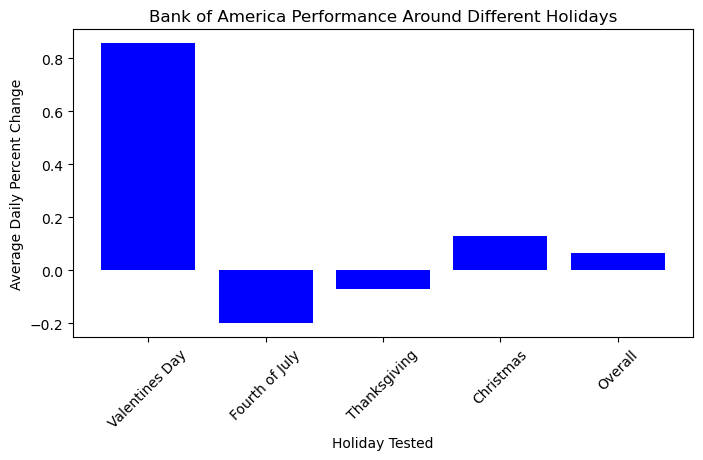

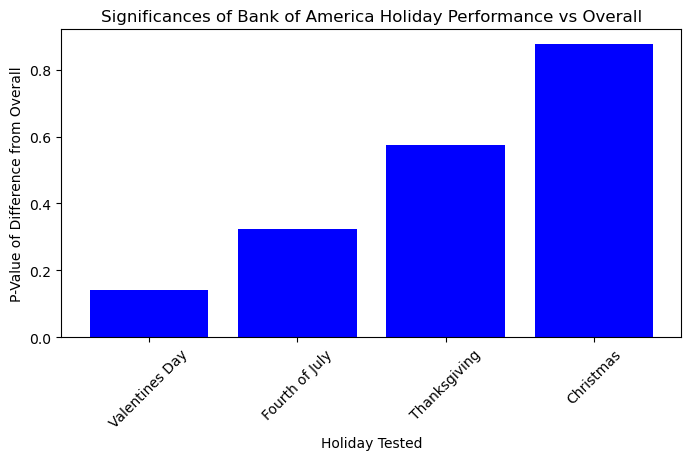

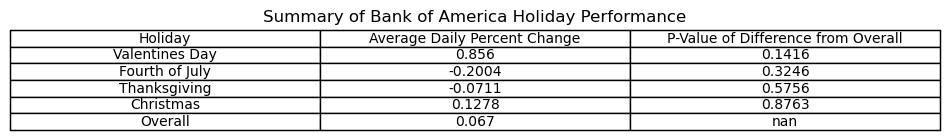

In [57]:
BAC_summary = pd.DataFrame({'Holiday': ['Valentines Day', 'Fourth of July', 'Thanksgiving', 'Christmas', 'Overall'], 
              'Average Daily Percent Change': [ave_BACva, ave_BACfj, ave_BACth, ave_BACch, ave_BACoverall], 'P-Value of Difference from Overall':[pvalue_BACva, pvalue_BACfj, pvalue_BACth, pvalue_BACch, None]})

#First, bar graph showing the daily performance around holidays is shown
plt.figure(figsize=(8, 4))
plt.bar(BAC_summary['Holiday'], BAC_summary['Average Daily Percent Change'], color='b')
plt.title('Bank of America Performance Around Different Holidays')
plt.xlabel('Holiday Tested')
plt.ylabel('Average Daily Percent Change')
plt.xticks(rotation=45)
plt.savefig('BAC_holidays_pct_chg.jpg', bbox_inches="tight")
plt.show()

#Next, the p-value of the difference from the overall performance is shown
plt.figure(figsize=(8, 4))
plt.bar(BAC_summary[0:4]['Holiday'], BAC_summary[0:4]['P-Value of Difference from Overall'], color='b')
plt.title('Significances of Bank of America Holiday Performance vs Overall')
plt.xlabel('Holiday Tested')
plt.ylabel('P-Value of Difference from Overall')
plt.xticks(rotation=45)
plt.savefig('BAC_holidays_pvalues_chg.jpg', bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 1.3))
plt.title('Summary of Bank of America Holiday Performance')
plt.table(cellText = BAC_summary.round(4).values, colLabels= BAC_summary.columns,
              loc='center',cellLoc='center')
plt.xticks([])
plt.yticks([])
plt.savefig('BAC_holidays_table.jpg', bbox_inches="tight")
plt.show()

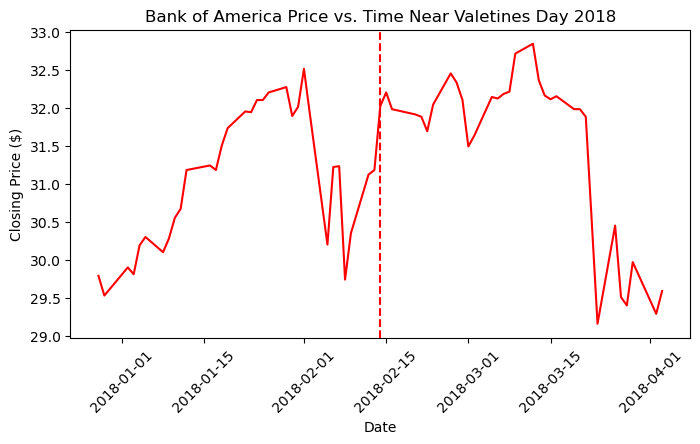

In [59]:
plt.figure(figsize=(8, 4))
plt.plot(BAC_proc.iloc[va18s-30:va18e+30]['Date'], BAC_proc.iloc[va18s-30:va18e+30]['Close'], linestyle='-', color='r')
plt.title('Bank of America Price vs. Time Near Valetines Day 2018')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.xticks(rotation=45)
plt.axvline(x = datetime.datetime(2018, 2, 14), color = 'r', linestyle = '--')
plt.savefig('BAC_prices_va2018.jpg', bbox_inches="tight")
plt.show()